In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif,mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,balanced_accuracy_score,recall_score
import time
df=pd.read_csv('sh_smdm_data.csv')
df.head()

,Unnamed: 0,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,627,120,0.003,0.000,0.002,0.001,0.0,0.000,46,1.5,...,189,9,0,125,123,126,15,0,2,1
1,1472,148,0.004,0.000,0.005,0.000,0.0,0.000,37,0.8,...,181,1,0,157,157,159,3,0,2,1
2,622,133,0.008,0.017,0.004,0.000,0.0,0.000,36,3.1,...,159,4,0,143,137,142,28,1,2,1
3,765,141,0.000,0.003,0.000,0.000,0.0,0.000,76,0.2,...,146,1,0,142,140,142,0,0,10,2
4,700,130,0.000,0.346,0.003,0.003,0.0,0.003,29,2.2,...,190,13,0,129,106,122,129,0,8,3


In [180]:
df=df.iloc[:,1:]
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.003,0.000,0.002,0.001,0.0,0.000,46,1.5,11,...,189,9,0,125,123,126,15,0,2,1
1,148,0.004,0.000,0.005,0.000,0.0,0.000,37,0.8,0,...,181,1,0,157,157,159,3,0,2,1
2,133,0.008,0.017,0.004,0.000,0.0,0.000,36,3.1,0,...,159,4,0,143,137,142,28,1,2,1
3,141,0.000,0.003,0.000,0.000,0.0,0.000,76,0.2,62,...,146,1,0,142,140,142,0,0,10,2
4,130,0.000,0.346,0.003,0.003,0.0,0.003,29,2.2,0,...,190,13,0,129,106,122,129,0,8,3


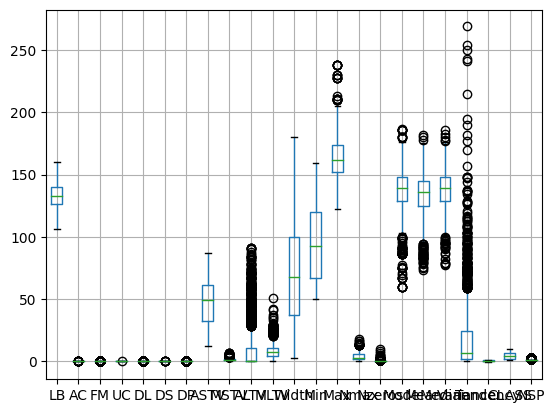

In [181]:
X=df.iloc[:,:21]
Y=df.iloc[:,21]
df.boxplot()
plt.show()

In [151]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
df=pd.concat([X,Y],axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,CLASS
0,-1.352220,-0.046128,-0.203210,-0.803434,-0.300544,-0.057476,-0.268754,-0.057603,0.189365,0.062707,...,-1.237748,1.392121,1.672537,-0.458444,-0.760316,-0.744746,-0.835937,-0.131446,-0.524526,2
1,1.493734,0.212626,-0.203210,0.215111,-0.638438,-0.057476,-0.268754,-0.581201,-0.603357,-0.535361,...,1.638415,0.946189,-1.040530,-0.458444,1.193592,1.436149,1.445718,-0.545656,-0.524526,2
2,-0.030884,1.247640,0.161168,-0.124404,-0.638438,-0.057476,-0.268754,-0.639378,2.001300,-0.535361,...,-1.339260,-0.280123,-0.023130,-0.458444,0.338757,0.153270,0.270320,0.317282,1.112980,2
3,0.782245,-0.822388,-0.138908,-1.482465,-0.638438,-0.057476,-0.268754,1.687723,-1.282833,2.835568,...,1.367717,-1.004762,-1.040530,-0.458444,0.277698,0.345702,0.270320,-0.649208,-0.524526,10
4,-0.335808,-0.822388,7.212951,-0.463919,0.375243,-0.057476,4.817640,-1.046621,0.982087,-0.535361,...,-1.339260,1.447863,3.029071,-0.458444,-0.516077,-1.835194,-1.112501,3.803548,-0.524526,8


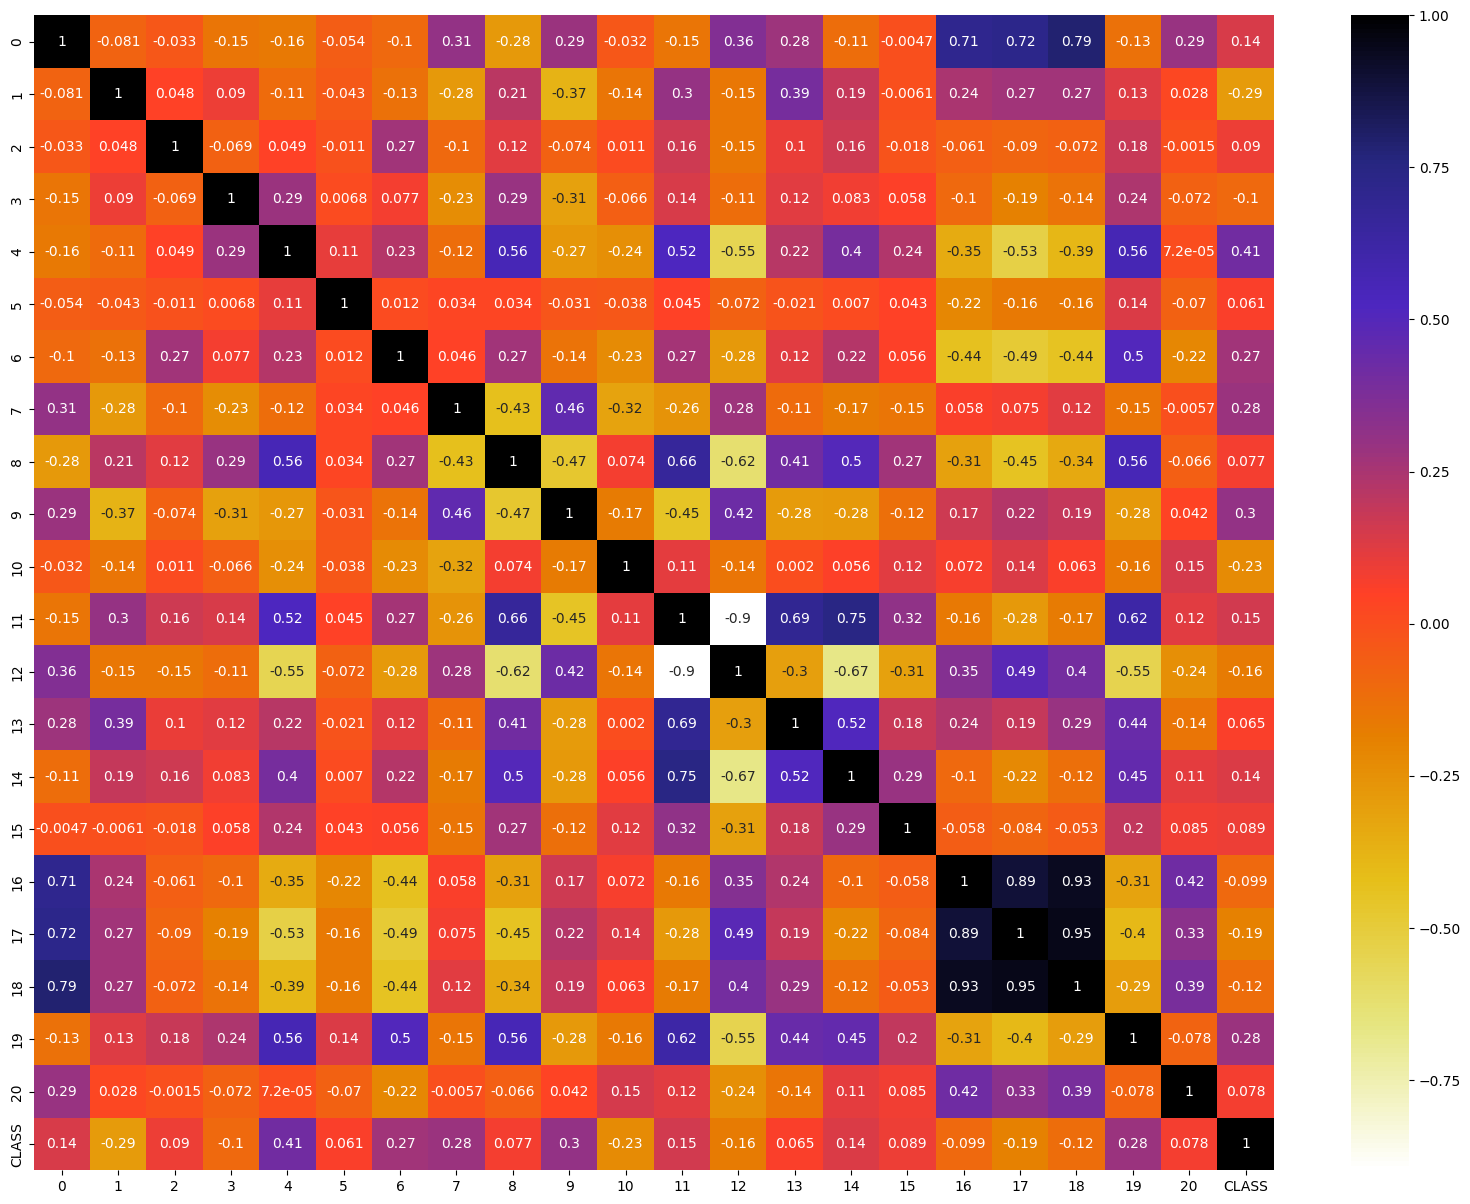

In [152]:
cor = df.corr()                   
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

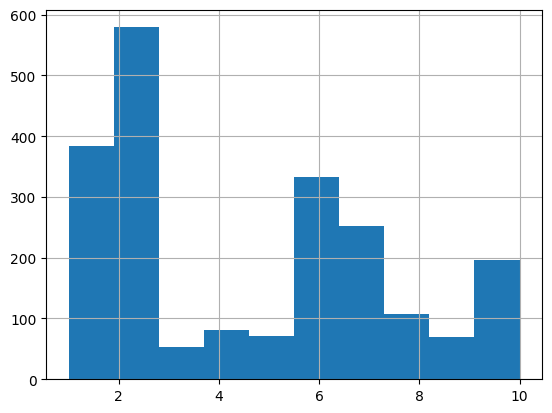

In [153]:
df['CLASS'].hist()      #παρατηρούμε πως έχουμε λίγες παρατηρήσεις στην κλάση 3
plt.show()

In [155]:
df=df.to_numpy()

## Για αριθμητικα in_features και κατηγορηματικα target_feat παμε είτε με f_classif(ANOVA) ή με mutual_info_classif(ενας συντελεστης σχεσης απο 0-1.Μετα απο δοκιμες το mutual δουλευει καλυτερα στο dataset

In [156]:
selector=SelectKBest(mutual_info_classif,k=11) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 7, 8, 9, 11, 12, 13, 16, 17, 19], dtype='int64')

Prediction accuracy for the training dataset is:  85.2 %
Prediction accuracy for the testing dataset is:  81.5 %
Prediction balanced accuracy for the training dataset is:  72.4 %
Prediction balanced accuracy for the testing dataset is:  75.0 %
Recall accuracy for the training dataset is:  85.2 %
Recall accuracy for the testing dataset is:  81.5 %
--------------- Confusion Matrix ---------------
[[61  6  0  0  1  2  0  0  0  6]
 [ 9 90  0  0  0  4  0  0  0  0]
 [ 2  2  6  0  0  0  0  0  0  0]
 [ 0  2  0 10  0  0  0  0  0  0]
 [ 7  2  0  0  7  0  0  0  0  1]
 [ 1  4  0  0  0 57  3  0  0  0]
 [ 2  0  0  0  0  2 58  0  0  0]
 [ 0  0  0  0  0  1  1 20  0  0]
 [ 3  0  0  0  0  0  0  0  9  3]
 [14  1  0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

     class 1     0.6162    0.8026    0.6971        76
     class 2     0.8411    0.8738    0.8571       103
     class 3     1.0000    0.6000    0.7500        10
     class 4     1.0000    0.8333    0.9091        12


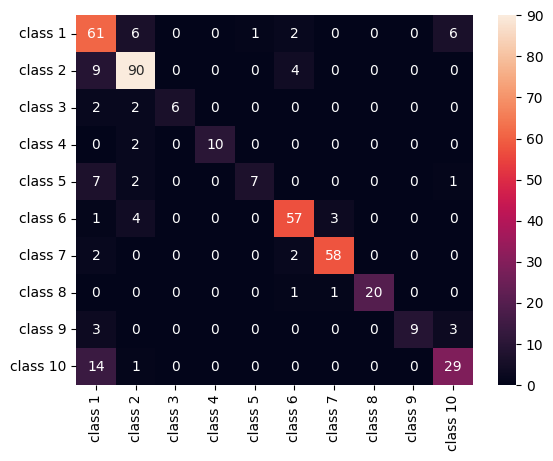

In [157]:
num_feats=df[:,:21]
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [158]:
selector=SelectKBest(mutual_info_classif,k=11) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 7, 8, 9, 11, 12, 16, 17, 18, 19], dtype='int64')

Prediction accuracy for the training dataset is:  81.8 %
Prediction accuracy for the testing dataset is:  79.8 %
Prediction balanced accuracy for the training dataset is:  67.1 %
Prediction balanced accuracy for the testing dataset is:  67.5 %
Recall accuracy for the training dataset is:  81.8 %
Recall accuracy for the testing dataset is:  79.8 %
--------------- Confusion Matrix ---------------
[[58  5  0  0  1  2  0  0  1  9]
 [ 7 90  0  0  0  6  0  0  0  0]
 [ 8  1  0  0  0  1  0  0  0  0]
 [ 0  4  0  8  0  0  0  0  0  0]
 [ 8  2  0  0  4  0  0  0  0  3]
 [ 1  3  0  0  0 60  1  0  0  0]
 [ 2  0  0  0  0  3 57  0  0  0]
 [ 0  0  0  0  0  1  1 20  0  0]
 [ 1  0  0  0  0  0  0  0 11  3]
 [11  1  0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

     class 1     0.6042    0.7632    0.6744        76
     class 2     0.8491    0.8738    0.8612       103
     class 3     0.0000    0.0000    0.0000        10
     class 4     1.0000    0.6667    0.8000        12


C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

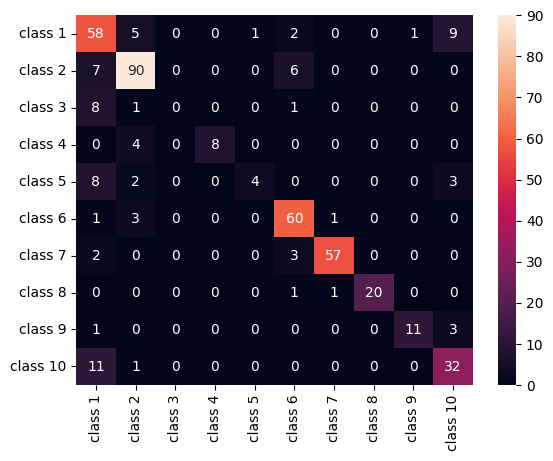

In [159]:
num_feats=df[:,[1, 4, 7, 8, 9, 11, 12, 16, 17, 18, 19]]
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [160]:
selector=SelectKBest(mutual_info_classif,k=2) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 19], dtype='int64')

Prediction accuracy for the training dataset is:  64.4 %
Prediction accuracy for the testing dataset is:  62.9 %
Prediction balanced accuracy for the training dataset is:  39.6 %
Prediction balanced accuracy for the testing dataset is:  39.8 %
Recall accuracy for the training dataset is:  64.4 %
Recall accuracy for the testing dataset is:  62.9 %
--------------- Confusion Matrix ---------------
[[65 11  0  0  0  0  0  0  0  0]
 [ 2 92  0  0  0  9  0  0  0  0]
 [ 5  4  0  0  0  0  1  0  0  0]
 [ 0  4  0  4  0  4  0  0  0  0]
 [10  5  0  0  0  0  2  0  0  0]
 [ 1 11  0  1  0 50  2  0  0  0]
 [ 8  0  0  0  0  3 50  1  0  0]
 [ 0  0  0  0  0  3 12  7  0  0]
 [15  0  0  0  0  0  0  0  0  0]
 [42  1  0  0  0  0  1  0  0  0]]
              precision    recall  f1-score   support

     class 1     0.4392    0.8553    0.5804        76
     class 2     0.7188    0.8932    0.7965       103
     class 3     0.0000    0.0000    0.0000        10
     class 4     0.8000    0.3333    0.4706        12


C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

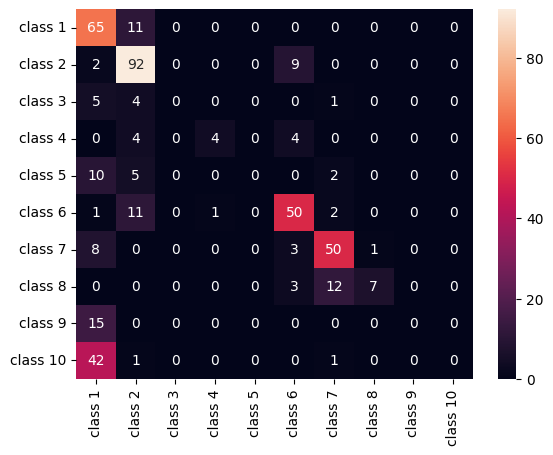

In [161]:
num_feats=df[:,[1,19]]
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [162]:
selector=SelectKBest(mutual_info_classif,k=3) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 19], dtype='int64')

Prediction accuracy for the training dataset is:  69.9 %
Prediction accuracy for the testing dataset is:  71.1 %
Prediction balanced accuracy for the training dataset is:  44.2 %
Prediction balanced accuracy for the testing dataset is:  48.0 %
Recall accuracy for the training dataset is:  69.9 %
Recall accuracy for the testing dataset is:  71.1 %
--------------- Confusion Matrix ---------------
[[73  2  0  0  0  1  0  0  0  0]
 [ 4 95  0  0  0  4  0  0  0  0]
 [ 6  3  0  0  0  1  0  0  0  0]
 [ 0  6  0  6  0  0  0  0  0  0]
 [12  5  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0 59  2  1  0  0]
 [ 1  0  0  0  0  2 57  2  0  0]
 [ 0  0  0  0  0  3  6 13  0  0]
 [15  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

     class 1     0.4710    0.9605    0.6320        76
     class 2     0.8333    0.9223    0.8756       103
     class 3     0.0000    0.0000    0.0000        10
     class 4     1.0000    0.5000    0.6667        12


C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

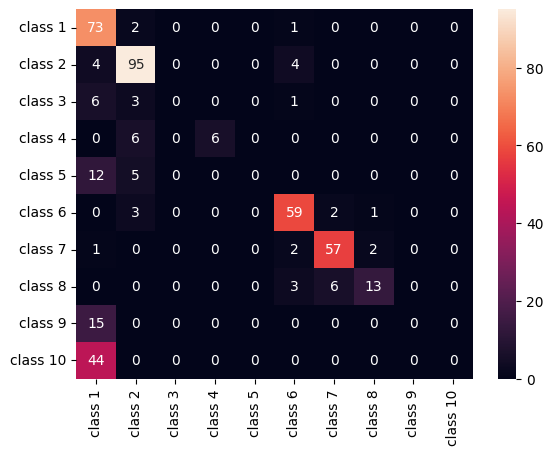

In [163]:
num_feats=df[:,[1, 4, 19]]
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [164]:
selector=SelectKBest(mutual_info_classif,k=4) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 11, 19], dtype='int64')

Prediction accuracy for the training dataset is:  75.3 %
Prediction accuracy for the testing dataset is:  77.0 %
Prediction balanced accuracy for the training dataset is:  52.2 %
Prediction balanced accuracy for the testing dataset is:  54.4 %
Recall accuracy for the training dataset is:  75.3 %
Recall accuracy for the testing dataset is:  77.0 %
--------------- Confusion Matrix ---------------
[[66  2  0  0  0  2  0  0  0  6]
 [ 4 93  0  1  0  5  0  0  0  0]
 [ 7  2  0  0  0  1  0  0  0  0]
 [ 0  6  0  6  0  0  0  0  0  0]
 [11  5  0  0  0  0  0  0  0  1]
 [ 0  2  0  0  0 61  0  2  0  0]
 [ 1  0  0  0  0  2 58  1  0  0]
 [ 0  0  0  0  0  1  8 13  0  0]
 [ 1  0  0  0  0  0  0  0  0 14]
 [12  1  0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

     class 1     0.6471    0.8684    0.7416        76
     class 2     0.8378    0.9029    0.8692       103
     class 3     0.0000    0.0000    0.0000        10
     class 4     0.8571    0.5000    0.6316        12


C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

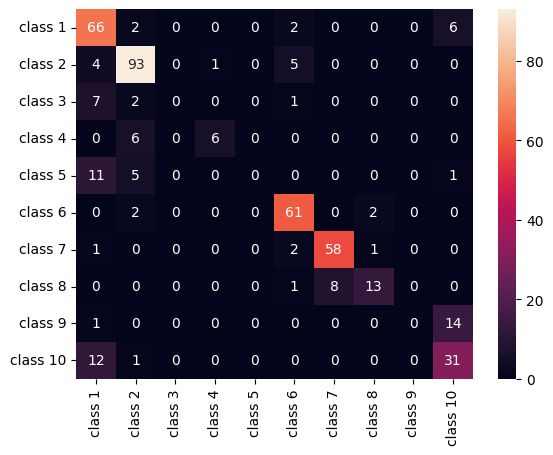

In [165]:
num_feats=df[:,[1, 4, 8, 19]]    #αν και to mutual_info προτεινε την 11 με την 11 παμε στο 70.7% ενω με την 8 παμε στο 77%
cat_feats=df[:,21]                 #γενικα η mutual_info δεν δινει παντα τον ιδιο συνδυασμο οπως ενημερωνει και το scikit-learn

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [166]:
selector=SelectKBest(mutual_info_classif,k=5) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 8, 11, 19], dtype='int64')

Prediction accuracy for the training dataset is:  75.7 %
Prediction accuracy for the testing dataset is:  77.9 %
Prediction balanced accuracy for the training dataset is:  53.3 %
Prediction balanced accuracy for the testing dataset is:  56.9 %
Recall accuracy for the training dataset is:  75.7 %
Recall accuracy for the testing dataset is:  77.9 %
--------------- Confusion Matrix ---------------
[[62  3  0  0  0  2  0  0  0  9]
 [ 6 92  0  0  0  5  0  0  0  0]
 [ 8  1  0  0  0  1  0  0  0  0]
 [ 0  4  0  8  0  0  0  0  0  0]
 [11  5  0  0  0  0  0  0  0  1]
 [ 0  2  0  0  0 62  0  1  0  0]
 [ 1  0  0  0  0  1 59  1  0  0]
 [ 0  0  0  0  0  1  8 13  0  0]
 [ 0  0  0  0  0  0  0  0  0 15]
 [ 7  1  0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

     class 1     0.6526    0.8158    0.7251        76
     class 2     0.8519    0.8932    0.8720       103
     class 3     0.0000    0.0000    0.0000        10
     class 4     1.0000    0.6667    0.8000        12


C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

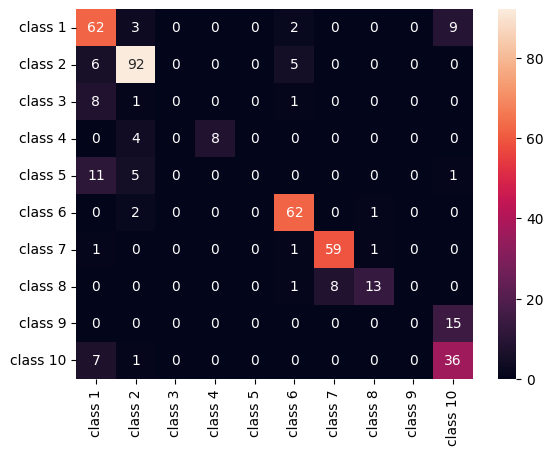

In [167]:
num_feats=df[:,[1, 4, 8, 11, 19]]
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [168]:
selector=SelectKBest(mutual_info_classif,k=6) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 8, 11, 12, 19], dtype='int64')

Prediction accuracy for the training dataset is:  79.0 %
Prediction accuracy for the testing dataset is:  79.1 %
Prediction balanced accuracy for the training dataset is:  59.5 %
Prediction balanced accuracy for the testing dataset is:  61.9 %
Recall accuracy for the training dataset is:  79.0 %
Recall accuracy for the testing dataset is:  79.1 %
--------------- Confusion Matrix ---------------
[[59  3  0  0  0  2  0  0  0 12]
 [ 6 92  0  0  0  5  0  0  0  0]
 [ 8  1  0  0  0  1  0  0  0  0]
 [ 0  5  0  7  0  0  0  0  0  0]
 [11  5  0  0  0  0  0  0  0  1]
 [ 1  3  0  0  0 59  2  0  0  0]
 [ 1  0  0  0  0  4 56  1  0  0]
 [ 0  0  0  0  0  0  2 20  0  0]
 [ 0  0  0  0  0  0  0  0  5 10]
 [ 3  1  0  0  0  0  1  0  0 39]]
              precision    recall  f1-score   support

     class 1     0.6629    0.7763    0.7152        76
     class 2     0.8364    0.8932    0.8638       103
     class 3     0.0000    0.0000    0.0000        10
     class 4     1.0000    0.5833    0.7368        12


C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

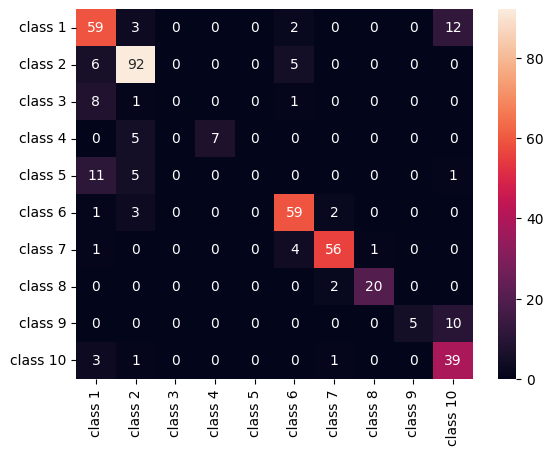

In [169]:
num_feats=df[:,[1, 4, 8, 11,7, 19]]   #το mut_info προτεινει την 12 αλλα το συγκεκριμενο feature ριχνει την αποδοση
cat_feats=df[:,21]                     #θα κινηθουμε με επιλογη απο το heatmap

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [170]:
selector=SelectKBest(mutual_info_classif,k=8) #το mutual_info επιμενει για την 12 ωστοσο παλι δεν κερδιζουμε ακριβεια
selector.fit(X,Y)                   #οπότε θα αυξήσουμε το k κατα μια μοναδα και θα παρουμε την αμεσως επομενη καλυτερη επιλογη
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 7, 8, 11, 12, 17, 19], dtype='int64')

Prediction accuracy for the training dataset is:  81.5 %
Prediction accuracy for the testing dataset is:  79.6 %
Prediction balanced accuracy for the training dataset is:  63.7 %
Prediction balanced accuracy for the testing dataset is:  63.9 %
Recall accuracy for the training dataset is:  81.5 %
Recall accuracy for the testing dataset is:  79.6 %
--------------- Confusion Matrix ---------------
[[58  7  0  0  0  2  0  0  0  9]
 [ 5 92  0  0  0  6  0  0  0  0]
 [ 8  1  0  0  0  1  0  0  0  0]
 [ 0  3  0  9  0  0  0  0  0  0]
 [11  3  0  0  0  0  0  0  0  3]
 [ 1  3  0  0  0 59  2  0  0  0]
 [ 1  0  0  0  0  2 59  0  0  0]
 [ 0  0  0  0  0  0  2 20  0  0]
 [ 1  0  0  0  0  0  0  0  6  8]
 [ 6  1  0  0  0  0  1  0  0 36]]
              precision    recall  f1-score   support

     class 1     0.6374    0.7632    0.6946        76
     class 2     0.8364    0.8932    0.8638       103
     class 3     0.0000    0.0000    0.0000        10
     class 4     1.0000    0.7500    0.8571        12


C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

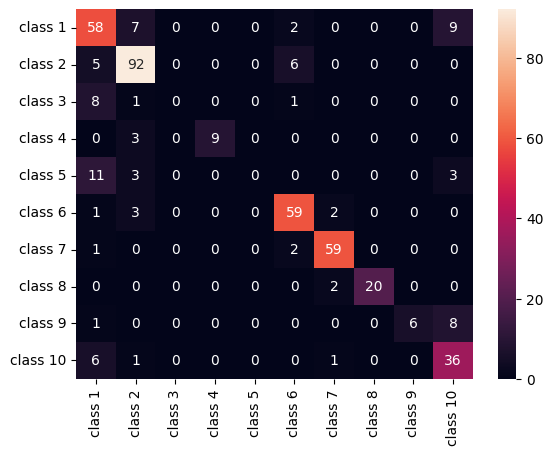

In [171]:
num_feats=df[:,[1, 4, 7, 8, 11,17, 19]]  #γενικα παρατηρουμε πως πλεον με οποιαδηποτε προσθηκη ενος feature η ακριβεια που παιρνουμε ειναι πολυ μικρη(κοντα στο 0.5%)
cat_feats=df[:,21]     #αυτο λογικα οφειλεται στο οτι ta features ειναι συσχετισμενα μεταξυ τους οποτε εχοντας εναν πλεον μεγαλο το πληθος συνδυασμο μεταβλητων η επομενη δε μας δινει ιδιαιτερα μεγαλη επιπλεον πληροφορια

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [172]:
selector=SelectKBest(mutual_info_classif,k=9) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 7, 8, 9, 11, 12, 17, 19], dtype='int64')

Prediction accuracy for the training dataset is:  82.6 %
Prediction accuracy for the testing dataset is:  82.2 %
Prediction balanced accuracy for the training dataset is:  68.8 %
Prediction balanced accuracy for the testing dataset is:  72.6 %
Recall accuracy for the training dataset is:  82.6 %
Recall accuracy for the testing dataset is:  82.2 %
--------------- Confusion Matrix ---------------
[[56  6  1  0  0  2  0  0  1 10]
 [ 4 94  0  0  0  5  0  0  0  0]
 [ 2  1  7  0  0  0  0  0  0  0]
 [ 0  3  0  9  0  0  0  0  0  0]
 [11  3  0  0  0  0  0  0  0  3]
 [ 2  1  0  0  0 61  1  0  0  0]
 [ 2  0  0  0  0  2 58  0  0  0]
 [ 0  0  0  0  0  0  2 20  0  0]
 [ 0  0  0  0  0  0  0  0  8  7]
 [ 6  1  0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

     class 1     0.6747    0.7368    0.7044        76
     class 2     0.8624    0.9126    0.8868       103
     class 3     0.8750    0.7000    0.7778        10
     class 4     1.0000    0.7500    0.8571        12


C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

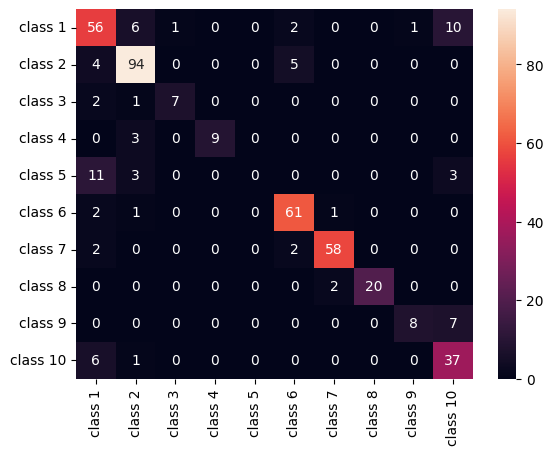

In [173]:
num_feats=df[:,[1, 4, 7, 8, 10, 11,  17, 19]]   # θα βαλουμε την 10 αντι της 9
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [174]:
selector=SelectKBest(mutual_info_classif,k=10) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 7, 8, 9, 11, 12, 16, 17, 19], dtype='int64')

Prediction accuracy for the training dataset is:  82.5 %
Prediction accuracy for the testing dataset is:  82.9 %
Prediction balanced accuracy for the training dataset is:  68.4 %
Prediction balanced accuracy for the testing dataset is:  72.2 %
Recall accuracy for the training dataset is:  82.5 %
Recall accuracy for the testing dataset is:  82.9 %
--------------- Confusion Matrix ---------------
[[58  4  1  0  0  2  0  0  1 10]
 [ 4 94  0  0  0  5  0  0  0  0]
 [ 2  1  7  0  0  0  0  0  0  0]
 [ 0  3  0  9  0  0  0  0  0  0]
 [11  3  0  0  0  0  0  0  0  3]
 [ 1  1  0  0  0 63  0  0  0  0]
 [ 2  0  0  0  0  1 59  0  0  0]
 [ 0  0  0  0  0  0  3 19  0  0]
 [ 0  0  0  0  0  0  0  0  7  8]
 [ 6  1  0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

     class 1     0.6905    0.7632    0.7250        76
     class 2     0.8785    0.9126    0.8952       103
     class 3     0.8750    0.7000    0.7778        10
     class 4     1.0000    0.7500    0.8571        12


C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

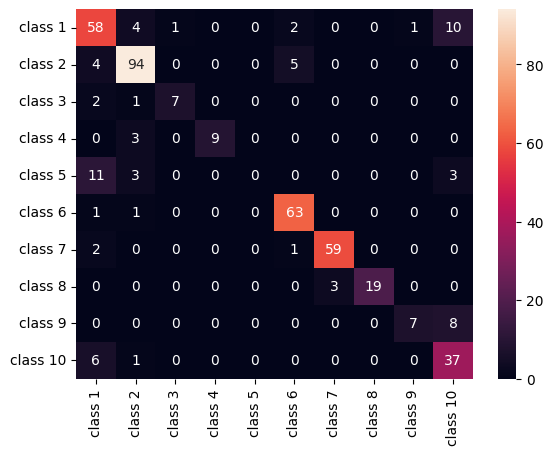

In [175]:
num_feats=df[:,[1, 4, 7, 8, 10, 11,6, 17, 19]]   #η 18 και η 16 ριχνει την αποδοση του αλγοριθμου
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [176]:
selector=SelectKBest(mutual_info_classif,k=11) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 7, 8, 9, 11, 12, 16, 17, 18, 19], dtype='int64')

Prediction accuracy for the training dataset is:  83.4 %
Prediction accuracy for the testing dataset is:  83.6 %
Prediction balanced accuracy for the training dataset is:  68.8 %
Prediction balanced accuracy for the testing dataset is:  72.2 %
Recall accuracy for the training dataset is:  83.4 %
Recall accuracy for the testing dataset is:  83.6 %
--------------- Confusion Matrix ---------------
[[60  5  0  0  0  2  0  0  0  9]
 [ 4 95  0  0  0  4  0  0  0  0]
 [ 4  1  5  0  0  0  0  0  0  0]
 [ 0  3  0  9  0  0  0  0  0  0]
 [11  1  0  0  2  0  0  0  0  3]
 [ 0  1  0  0  0 63  1  0  0  0]
 [ 2  0  0  0  0  1 59  0  0  0]
 [ 0  0  0  0  0  1  2 19  0  0]
 [ 0  0  0  0  0  0  0  0  8  7]
 [ 8  0  0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

     class 1     0.6742    0.7895    0.7273        76
     class 2     0.8962    0.9223    0.9091       103
     class 3     1.0000    0.5000    0.6667        10
     class 4     1.0000    0.7500    0.8571        12


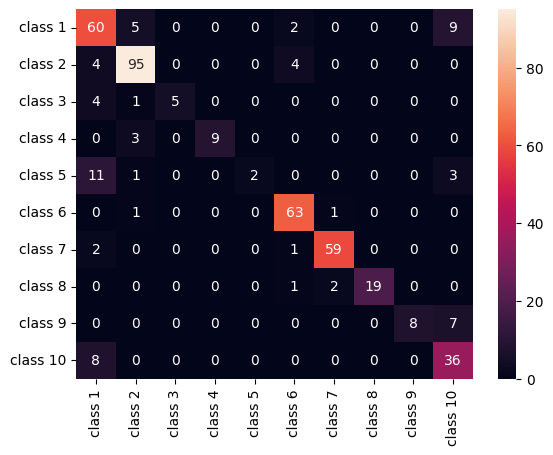

In [177]:
num_feats=df[:,[1, 4, 6,7, 8,10, 11,14, 17, 19,20]]  #πρωτη φορα μεχρι στιγμης έχουμε θετικο f1-score για την κλαση 5
cat_feats=df[:,21]     #αυτο οφειλεται στην προσθηκη της 14 καθως φαινεται εχει την (υπολοιπη) απαραιτητη πληροφορια για την προβλεψη παρατηρησεων που προερχονται απο την κλαση 5

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

Prediction accuracy for the training dataset is:  85.2 %
Prediction accuracy for the testing dataset is:  81.5 %
Prediction balanced accuracy for the training dataset is:  72.4 %
Prediction balanced accuracy for the testing dataset is:  75.0 %
Recall accuracy for the training dataset is:  85.2 %
Recall accuracy for the testing dataset is:  81.5 %
--------------- Confusion Matrix ---------------
[[61  6  0  0  1  2  0  0  0  6]
 [ 9 90  0  0  0  4  0  0  0  0]
 [ 2  2  6  0  0  0  0  0  0  0]
 [ 0  2  0 10  0  0  0  0  0  0]
 [ 7  2  0  0  7  0  0  0  0  1]
 [ 1  4  0  0  0 57  3  0  0  0]
 [ 2  0  0  0  0  2 58  0  0  0]
 [ 0  0  0  0  0  1  1 20  0  0]
 [ 3  0  0  0  0  0  0  0  9  3]
 [14  1  0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

     class 1     0.6162    0.8026    0.6971        76
     class 2     0.8411    0.8738    0.8571       103
     class 3     1.0000    0.6000    0.7500        10
     class 4     1.0000    0.8333    0.9091        12


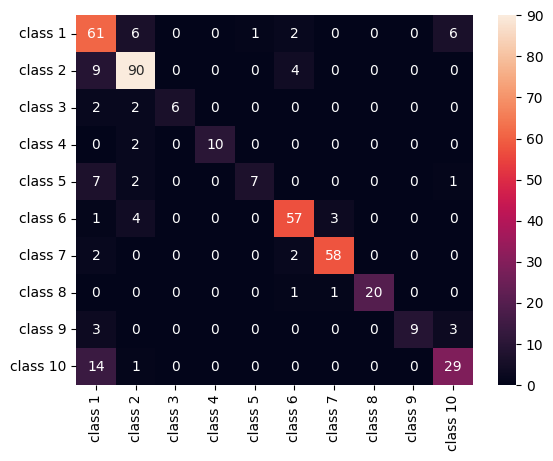

In [178]:
num_feats=df[:,:21]  
cat_feats=df[:,21]    

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)